In [1]:
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
training_file = './dataset/train_batch_0'
testing_file = './dataset/test_batch_0'

In [3]:
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [4]:
#X_train, y_train = train['data'], train['labels']
#X_test, y_test = test['data'], test['labels']
from keras.utils import np_utils

X_train = np.array(train['data'])
y_train = np.array(train['labels'])
X_test = np.array(test['data'])
y_test = np.array(test['labels'])

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
input_shape = (48, 48, 1)

#x_train =np.expand_dims(x_train, axis=0)
#x_test= np.expand_dims(x_test, axis=0)

In [5]:
print("Number of training examples =", X_train.shape[0])
print("Number of testing examples =", X_test.shape[0])
print("Image data shape =", X_train[0].shape)
print("Number of classes =", len(np.unique(y_train)))

Number of training examples = 7200
Number of testing examples = 7200
Image data shape = (48, 48, 1)
Number of classes = 6


In [6]:
model = Sequential()

model.add(Conv2D(64, (3,3), padding='same',
                 input_shape=(48, 48, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2)))

model.add(Conv2D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2)))

model.add(Dropout(0.1))

model.add(Conv2D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(6)) 
model.add(Activation('softmax'))
adam = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0         
__________

In [8]:
#adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-06, decay=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [9]:
#x_train = np.random.random((7200, 2304))
#y_train = keras.utils.to_categorical(np.random.randint(6, size=(7200, 1)), num_classes=6)
#x_test = np.random.random((7200, 2304))
#y_test = keras.utils.to_categorical(np.random.randint(6, size=(7200, 1)), num_classes=6)

In [10]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=6)

In [11]:
#np.resize(img, (-1, <image shape>)
#cnnhistory=model.fit(X_train, y_train, batch_size=None, epochs=1, verbose=1, callbacks=None, 
                     #validation_split=0.0, validation_data=(X_test, y_test), shuffle=True) 
                     #sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)
cnnhistory=model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), shuffle=True)

Train on 7200 samples, validate on 7200 samples
Epoch 1/100
7200/7200 [==============================] - 350s 49ms/step - loss: 4.5382 - acc: 0.2542 - val_loss: 1.3959 - val_acc: 0.4729
Epoch 2/100
7200/7200 [==============================] - 367s 51ms/step - loss: 1.7842 - acc: 0.3436 - val_loss: 1.4312 - val_acc: 0.5289
Epoch 3/100
7200/7200 [==============================] - 409s 57ms/step - loss: 1.5210 - acc: 0.4074 - val_loss: 1.2754 - val_acc: 0.5858
Epoch 4/100
7200/7200 [==============================] - 418s 58ms/step - loss: 1.3860 - acc: 0.4658 - val_loss: 1.1027 - val_acc: 0.6435
Epoch 5/100
7200/7200 [==============================] - 427s 59ms/step - loss: 1.2533 - acc: 0.5169 - val_loss: 0.9707 - val_acc: 0.7039
Epoch 6/100
7200/7200 [==============================] - 418s 58ms/step - loss: 1.1471 - acc: 0.5601 - val_loss: 0.8362 - val_acc: 0.7474
Epoch 7/100
7200/7200 [==============================] - 423s 59ms/step - loss: 1.0320 - acc: 0.6094 - val_loss: 0.7323 - va

7200/7200 [==============================] - 356s 49ms/step - loss: 0.0467 - acc: 0.9863 - val_loss: 0.0273 - val_acc: 0.9925
Epoch 60/100
7200/7200 [==============================] - 371s 52ms/step - loss: 0.0497 - acc: 0.9822 - val_loss: 0.0287 - val_acc: 0.9919
Epoch 61/100
7200/7200 [==============================] - 349s 48ms/step - loss: 0.0480 - acc: 0.9839 - val_loss: 0.0265 - val_acc: 0.9925
Epoch 62/100
7200/7200 [==============================] - 340s 47ms/step - loss: 0.0428 - acc: 0.9837 - val_loss: 0.0292 - val_acc: 0.9921
Epoch 63/100
7200/7200 [==============================] - 340s 47ms/step - loss: 0.0461 - acc: 0.9847 - val_loss: 0.0285 - val_acc: 0.9928
Epoch 64/100
7200/7200 [==============================] - 340s 47ms/step - loss: 0.0434 - acc: 0.9858 - val_loss: 0.0253 - val_acc: 0.9929
Epoch 65/100
7200/7200 [==============================] - 339s 47ms/step - loss: 0.0401 - acc: 0.9878 - val_loss: 0.0248 - val_acc: 0.9932
Epoch 66/100
7200/7200 [================

In [12]:
#cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=1200, validation_data=(x_testcnn, y_test), shuffle=True)

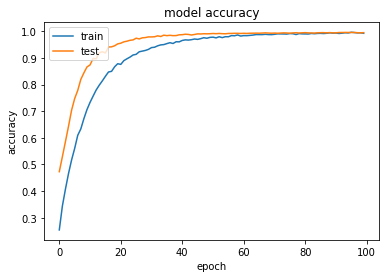

In [13]:
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

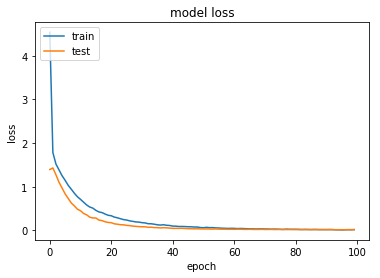

In [14]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import os

model_name = 'Emotion_face_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'model_checkpoints')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)